## 1. Let us analyse the students dataset.

In [11]:
## Import the required modules
import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from bokeh.plotting import figure, output_file, show#, output_notebook
output_file('example.html')
pd.set_option('display.max_columns', None)

In [12]:
## Read the cleaned csv file and load into a new dataframe.

df_students_clean = pd.read_csv('../../data/studentPublic_Clean.csv')

In [13]:
## Get info about the dataframe
df_students_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23819 entries, 0 to 23818
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         23819 non-null  int64  
 1   month        23819 non-null  object 
 2   nationality  23819 non-null  object 
 3   state        23819 non-null  object 
 4   students     23819 non-null  int64  
 5   share        23819 non-null  int64  
 6   growth       23819 non-null  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB


In [14]:
## Get the first few rows of the dataset
df_students_clean.head()

,year,month,nationality,state,students,share,growth
0,2020,Oct,_All,_All,677369,100,-8.0
1,2020,Oct,_All,NSW,257386,38,-8.0
2,2020,Oct,_All,NT,3925,1,25.0
3,2020,Oct,_All,SA,36751,5,1.0
4,2020,Oct,_All,TAS,13290,2,-2.0


In [15]:
## Get last rows of the dataset
df_students_clean.tail()

,year,month,nationality,state,students,share,growth
23814,2010,Dec,Montenegro,NSW,4,0,-80.0
23815,2010,Dec,Canada,NSW,1314,1,-3.0
23816,2010,Dec,Colombia,NSW,2022,1,-9.0
23817,2010,Dec,Tajikistan,NSW,4,0,50.0
23818,2010,Dec,Cameroon,NSW,4,0,0.0


In [16]:
## Create a dataframe to get yearly number of students from all nationalities and across all Australian states. 
df_yearly = df_students_clean[(df_students_clean['nationality'] == '_All') & (df_students_clean['state'] == '_All')]

In [17]:
## Sort the data by year
df_yearly.sort_values('year')

,year,month,nationality,state,students,share,growth
4962,2002,Dec,_All,_All,228192,100,0.0
1291,2003,Dec,_All,_All,256464,100,12.0
3126,2004,Dec,_All,_All,271259,100,6.0
4044,2005,Dec,_All,_All,288406,100,6.0
2208,2006,Dec,_All,_All,317007,100,10.0
5883,2007,Dec,_All,_All,370349,100,17.0
7722,2008,Dec,_All,_All,434257,100,17.0
6805,2009,Dec,_All,_All,491336,100,13.0
4963,2010,Dec,_All,_All,468718,100,-5.0
1292,2011,Dec,_All,_All,425601,100,-9.0


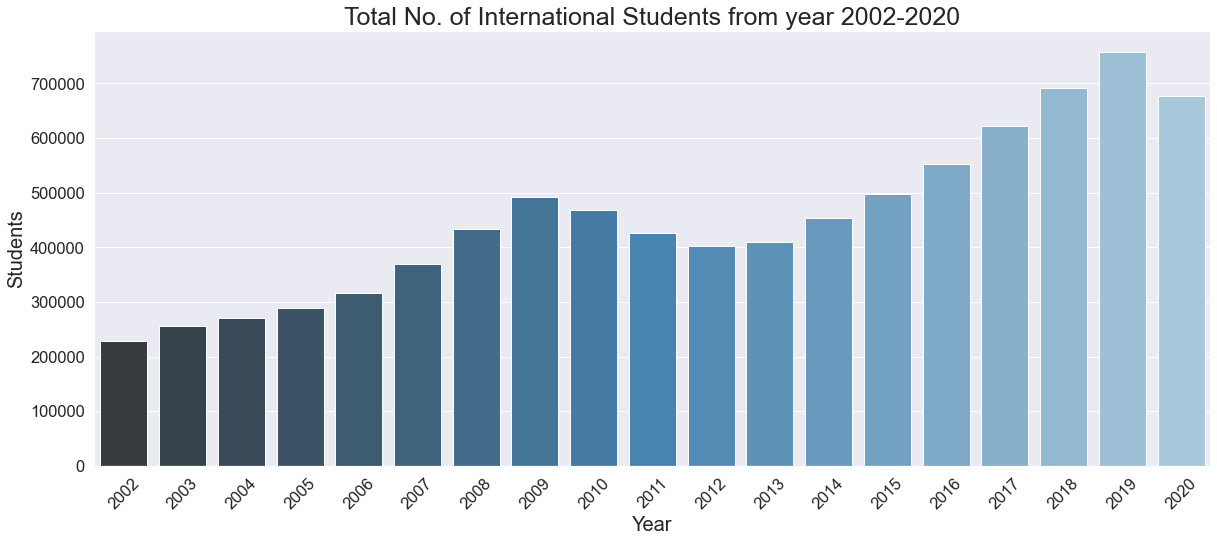

In [18]:
## The below plot shows yearly trend for Total Number of students from year 2002-2020

plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
sns.barplot(x = 'year',
            y = 'students',
            data = df_yearly, palette="Blues_d")
 
# Show the plot
plt.xlabel("Year", fontsize=20)
plt.ylabel("Students", fontsize=20)
plt.title("Total No. of International Students from year 2002-2020", fontsize=25)
plt.xticks(rotation=45)
plt.show()

### We can see from the above bar chart that number of students were growing steadily from 2012 till 2019 and there is small decrease in 2020. This could be attributed to COVID-19 and data for Nov and Dec'2020.  

In [19]:
df_yearly_1 = df_yearly.pivot_table(
    index=['year'],
    values=['students'],
    aggfunc='sum'
)

df_yearly_1

,students
year,
2002,228192
2003,256464
2004,271259
2005,288406
2006,317007
2007,370349
2008,434257
2009,491336
2010,468718


In [21]:
## Let's get the avergage number of students per year from 2002-2020.
df_yearly_1.mean()

students    453572.0
dtype: float64

In [22]:
##Lets check the countrywise students data for year 2020

df_countries_2020 = df_students_clean[(df_students_clean['nationality'] != '_All') & (df_students_clean['state'] == '_All') & (df_students_clean['year'] == 2020)]

In [23]:
df_countries_2020

,year,month,nationality,state,students,share,growth
9,2020,Oct,Argentina,_All,1395,0,13.0
10,2020,Oct,Bahrain,_All,37,0,-20.0
11,2020,Oct,"Congo, Republic of",_All,4,0,0.0
12,2020,Oct,Cote d'Ivoire,_All,4,0,-43.0
13,2020,Oct,Egypt,_All,415,0,2.0
...,...,...,...,...,...,...,...
200,2020,Oct,Sudan,_All,91,0,11.0
201,2020,Oct,Syria,_All,21,0,-5.0
202,2020,Oct,Tonga,_All,51,0,9.0
203,2020,Oct,United Kingdom,_All,6122,1,-13.0


In [24]:
## Sort the data based on students clount from highest to lowest.
df_countries_2020 = df_countries_2020.sort_values('students', ascending=False).head(20)

In [14]:
df_countries_2020

,year,month,nationality,state,students,share,growth
61,2020,Oct,China,_All,188377,28,-9.0
16,2020,Oct,India,_All,113342,17,2.0
99,2020,Oct,Nepal,_All,51904,8,0.0
106,2020,Oct,Vietnam,_All,23943,4,-6.0
131,2020,Oct,Brazil,_All,21459,3,-18.0
140,2020,Oct,Malaysia,_All,19963,3,-17.0
35,2020,Oct,Colombia,_All,18838,3,-4.0
189,2020,Oct,"Korea, Republic of (South)",_All,17983,3,-13.0
168,2020,Oct,Philippines,_All,17194,3,3.0
92,2020,Oct,Indonesia,_All,16894,2,-5.0


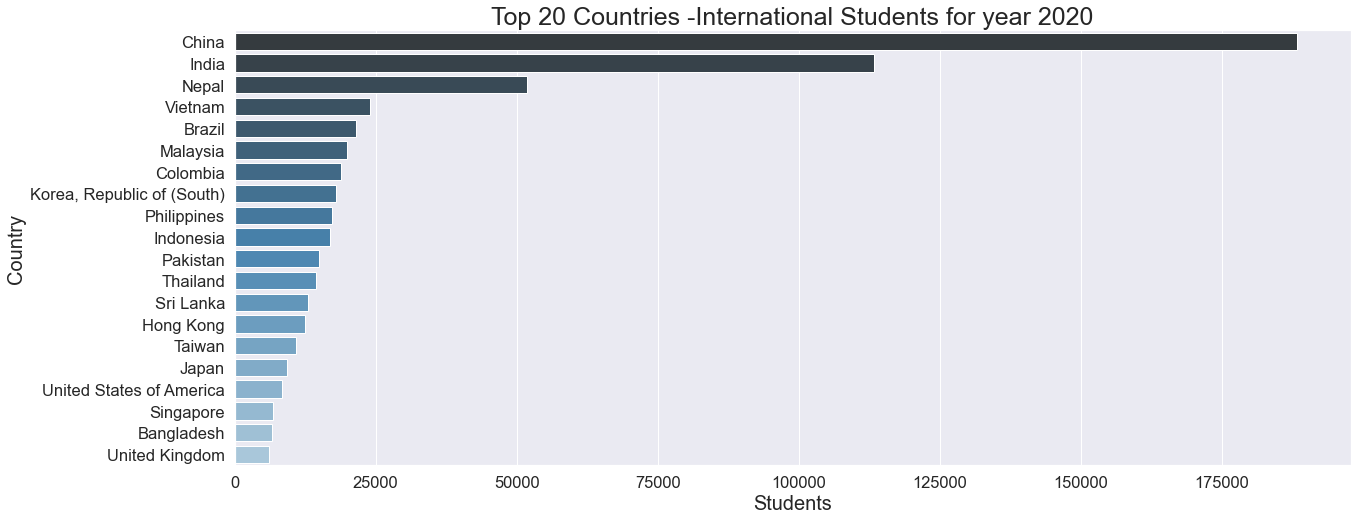

In [25]:
## The below plot shows Total Number of students year 2020 for top 20 countries

plt.figure(figsize=(20,8))
sns.set(font_scale=1.5)
sns.barplot(x = 'students',
            y = 'nationality',
            data = df_countries_2020, palette="Blues_d")
# Show the plot
plt.xlabel("Students", fontsize=20)
plt.ylabel("Country", fontsize=20)
plt.title("Top 20 Countries -International Students for year 2020", fontsize=25)
##plt.xticks(rotation=45)
plt.show()

## We can see from the above bar chart that China has highest number of students in 2020 followed by India and Nepal.

In [26]:
## Let's get the students data from 2002-2020 for each Australian State/Territory.

df_states = df_students_clean[(df_students_clean['nationality'] == '_All') & (df_students_clean['state'] != '_All')]

In [17]:
df_states

,year,month,nationality,state,students,share,growth
1,2020,Oct,_All,NSW,257386,38,-8.0
2,2020,Oct,_All,NT,3925,1,25.0
3,2020,Oct,_All,SA,36751,5,1.0
4,2020,Oct,_All,TAS,13290,2,-2.0
5,2020,Oct,_All,ACT,15437,2,-6.0
...,...,...,...,...,...,...,...
7738,2016,Dec,_All,WA,41235,7,7.0
7739,2017,Dec,_All,VIC,200214,32,14.0
7740,2018,Dec,_All,VIC,226656,33,13.0
7741,2019,Dec,_All,VIC,250986,33,11.0


In [27]:
df_states.head()

,year,month,nationality,state,students,share,growth
1,2020,Oct,_All,NSW,257386,38,-8.0
2,2020,Oct,_All,NT,3925,1,25.0
3,2020,Oct,_All,SA,36751,5,1.0
4,2020,Oct,_All,TAS,13290,2,-2.0
5,2020,Oct,_All,ACT,15437,2,-6.0


In [19]:
df_states.tail()

,year,month,nationality,state,students,share,growth
7738,2016,Dec,_All,WA,41235,7,7.0
7739,2017,Dec,_All,VIC,200214,32,14.0
7740,2018,Dec,_All,VIC,226656,33,13.0
7741,2019,Dec,_All,VIC,250986,33,11.0
7742,2002,Dec,_All,NT,520,0,0.0


In [20]:
## Sort the values by year.

df_states.sort_values('year')

,year,month,nationality,state,students,share,growth
7742,2002,Dec,_All,NT,520,0,0.0
4983,2002,Dec,_All,ACT,4515,2,0.0
4064,2002,Dec,_All,WA,22876,10,0.0
3146,2002,Dec,_All,VIC,62910,28,0.0
2228,2002,Dec,_All,TAS,2456,1,0.0
...,...,...,...,...,...,...,...
5,2020,Oct,_All,ACT,15437,2,-6.0
6,2020,Oct,_All,QLD,98847,15,-13.0
7,2020,Oct,_All,VIC,222398,33,-8.0
4,2020,Oct,_All,TAS,13290,2,-2.0


Text(0.5, 1.0, 'Yearly Distribution of Students in Each State')

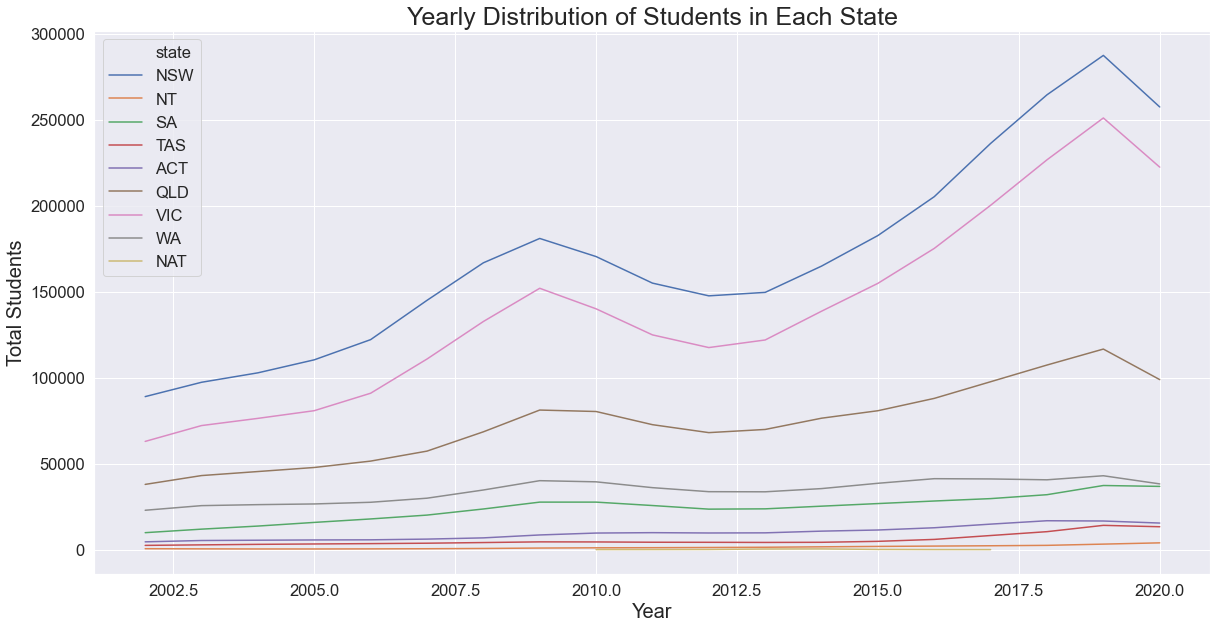

In [21]:
## The below line chart shows students trend for all the Australian Stats/Territories for the years 2002-2020.

fig_size = (20, 10)
fig, ax = plt.subplots(figsize=fig_size)
sns.lineplot(data=df_states, x='year', y='students', hue='state', ax=ax)
plt.xlabel("Year", fontsize= 20)
plt.ylabel("Total Students", fontsize= 20)
plt.title("Yearly Distribution of Students in Each State", fontsize= 25)

## We can see from the above line chart that NSW has highest number of students for all the years followed by Victoria and Queensland.

## 2. Let us analyse the enrolments dataset.

In [28]:
## Read the cleaned csv file and load into a new dataframe.

df_enrol_clean = pd.read_csv('../../data/nationalitySummary_Clean.csv')

In [29]:
df_enrol_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13079 entries, 0 to 13078
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      13079 non-null  int64  
 1   month                     13079 non-null  object 
 2   sector                    13079 non-null  object 
 3   nationality               13079 non-null  object 
 4   level of study            13079 non-null  object 
 5   broad field of education  13079 non-null  object 
 6   enrolments                13079 non-null  int64  
 7   commencements             13079 non-null  int64  
 8   enrolmentsshare           13079 non-null  int64  
 9   enrolmentsgrowth          13079 non-null  float64
 10  commencementsshare        13079 non-null  float64
 11  commencementsgrowth       13079 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 1.2+ MB


In [30]:
df_enrol_clean.head()

,year,month,sector,nationality,level of study,broad field of education,enrolments,commencements,enrolmentsshare,enrolmentsgrowth,commencementsshare,commencementsgrowth
0,2019,Dec,_All,_All,_All,_All,956773,515082,100,0.0,100.0,0.0
1,2019,Dec,_All,Canada,_All,_All,4717,2328,0,1.0,0.0,-5.0
2,2019,Dec,_All,Gaza Strip and West Bank,_All,_All,30,10,0,-21.0,0.0,-23.0
3,2019,Dec,_All,Dominican Republic,_All,_All,7,4,0,-50.0,0.0,-80.0
4,2019,Dec,_All,Oman,_All,_All,1192,494,0,-1.0,0.0,-10.0


In [31]:
df_sector2020 = df_enrol_clean[(df_enrol_clean['sector'] != '_All') & (df_enrol_clean['level of study'] == '_All') & (df_enrol_clean['broad field of education'] == '_All') & (df_enrol_clean['year'] == 2020)]

In [26]:
df_sector2020

,year,month,sector,nationality,level of study,broad field of education,enrolments,commencements,enrolmentsshare,enrolmentsgrowth,commencementsshare,commencementsgrowth
2890,2020,Oct,VET,Armenia,_All,_All,5,4,29,400.0,67.0,0.0
2891,2020,Oct,VET,Israel,_All,_All,132,64,58,-9.0,61.0,-19.0
2892,2020,Oct,VET,Guinea,_All,_All,4,4,33,0.0,100.0,0.0
2893,2020,Oct,Schools,Tonga,_All,_All,7,4,12,-13.0,16.0,-33.0
2894,2020,Oct,Schools,Egypt,_All,_All,13,7,3,8.0,4.0,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3614,2020,Oct,Higher Education,Bhutan,_All,_All,2246,738,53,16.0,40.0,-26.0
3615,2020,Oct,Non-award,Maldives,_All,_All,4,4,1,-75.0,4.0,-60.0
3616,2020,Oct,Higher Education,Latvia,_All,_All,16,7,19,-6.0,18.0,133.0
3617,2020,Oct,Schools,Czech Republic,_All,_All,6,6,1,-65.0,1.0,-45.0


In [32]:
df_sector2020 = df_sector2020.pivot_table(
    index=['sector'],
    values=['enrolments', 'commencements'],
    aggfunc='sum'
)

df_sector2020

,commencements,enrolments
sector,,
ELICOS,60669,98756
Higher Education,131173,413026
Non-award,19522,31380
Schools,8335,20509
VET,154360,293645


## We can see from the above table that highest number of enrolments in 2020 are in Higher Education sector followed by VET (Voacational Education & Training).
## On the other hand, highest number of commencements in 2020 are in VET followed by Higher Education.

Note: ELICOS -English Language Intensive Courses, 
      VET -Vocational Education and Training

In [33]:
## Let's see the %age of enrolments resulted into commencement for all the sectors.

df_sector2020['%age'] = ((df_sector2020['commencements'] / df_sector2020['enrolments']) * 100)
df_sector2020

,commencements,enrolments,%age
sector,,,
ELICOS,60669,98756,61.433229
Higher Education,131173,413026,31.759018
Non-award,19522,31380,62.211600
Schools,8335,20509,40.640694
VET,154360,293645,52.566875


### It is interesting to know that Higher Education has lowest %age of commencements although the enrolments are highest.

In [34]:
df_sector2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, ELICOS to VET
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   commencements  5 non-null      int64  
 1   enrolments     5 non-null      int64  
 2   %age           5 non-null      float64
dtypes: float64(1), int64(2)
memory usage: 160.0+ bytes


In [35]:
## Let's draw a Bokeh bar chart for Sector wise Enrolments for the year 2020

label = ['ELICOS', 'Higher Education', 'Non-award', 'Schools', 'VET']

p1 = figure(x_range=label,
    plot_height=500,
    plot_width=500,
    title="Sector-wise Enrolments - Year 2020",
    x_axis_label="Sector",
    y_axis_label="Total Enrolments"
)

p1.vbar(
    x=list(df_sector2020.index),
    top=df_sector2020.enrolments,
    color='firebrick', width=0.5
)
p1.left[0].formatter.use_scientific = False
p1.title.text_font_size = "20px"
show(p1)

In [31]:
## Let's draw a Bokeh bar chart for Sector wise Commencements for the year 2020

label = ['ELICOS', 'Higher Education', 'Non-award', 'Schools', 'VET']

p2 = figure(x_range=label,
    plot_height=500,
    plot_width=500,
    title="Sector-wise Commencements - Year 2020",
    x_axis_label="Sector",
    y_axis_label="Total Commencements"
)

p2.vbar(
    x=list(df_sector2020.index),
    top=df_sector2020.commencements,
    color='firebrick', width=0.5
)
p2.left[0].formatter.use_scientific = False
p2.title.text_font_size = "20px"
show(p2)

In [32]:
df_sector_all = df_enrol_clean[(df_enrol_clean['sector'] == '_All') & (df_enrol_clean['level of study'] == '_All') & (df_enrol_clean['broad field of education'] == '_All') & (df_enrol_clean['nationality'] == '_All')]

In [33]:
df_sector_all.head()

,year,month,sector,nationality,level of study,broad field of education,enrolments,commencements,enrolmentsshare,enrolmentsgrowth,commencementsshare,commencementsgrowth
0,2019,Dec,_All,_All,_All,_All,956773,515082,100,0.0,100.0,0.0
2693,2020,Oct,_All,_All,_All,_All,856901,373354,100,0.0,100.0,0.0


In [34]:
df_sector_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 2693
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      2 non-null      int64  
 1   month                     2 non-null      object 
 2   sector                    2 non-null      object 
 3   nationality               2 non-null      object 
 4   level of study            2 non-null      object 
 5   broad field of education  2 non-null      object 
 6   enrolments                2 non-null      int64  
 7   commencements             2 non-null      int64  
 8   enrolmentsshare           2 non-null      int64  
 9   enrolmentsgrowth          2 non-null      float64
 10  commencementsshare        2 non-null      float64
 11  commencementsgrowth       2 non-null      float64
dtypes: float64(3), int64(4), object(5)
memory usage: 208.0+ bytes


In [35]:
df_sector_all = df_sector_all.pivot_table(
    index='year',
    values=['enrolments', 'commencements'],
    aggfunc='mean'
)

df_sector_all

,commencements,enrolments
year,,
2019,515082,956773
2020,373354,856901


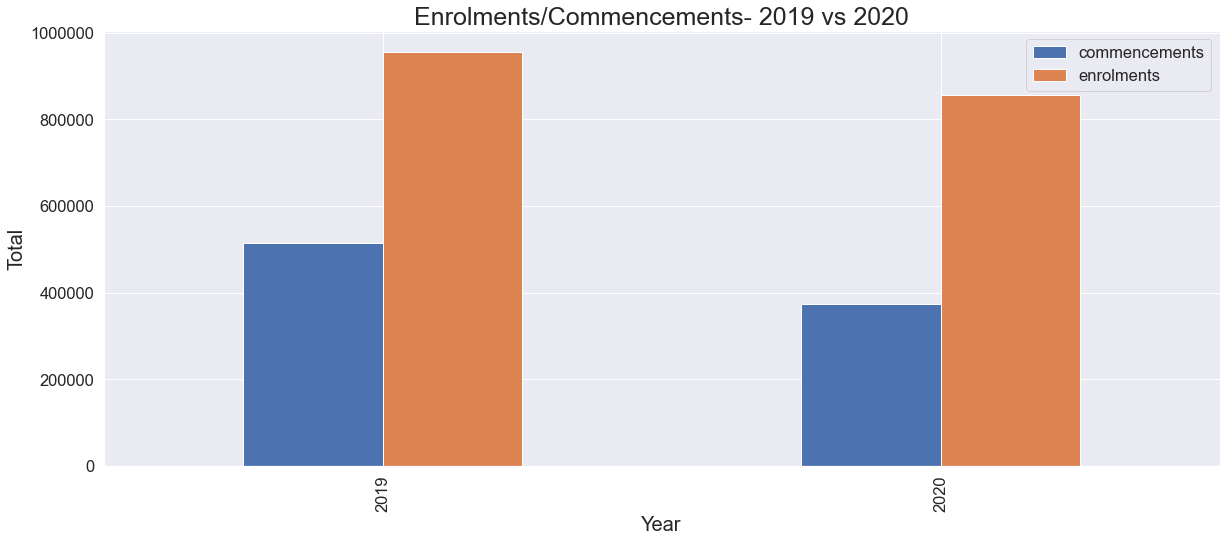

In [36]:
## Lets fraw a bar chart to compare enolments and commencemnets for 2019 & 2020.
fig, ax = plt.subplots(1,1, figsize=(20, 8))
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
df_sector_all.plot(kind='bar', ax=ax)
ax.legend()

plt.title('Enrolments/Commencements- 2019 vs 2020', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total', fontsize=20)

plt.show()